In [ ]:
# default_exp mining.unsupervised.eval

# Evaluating Neural Unsupervised Approaches for SE Traceability

> This module is dedicated to evaluate word2vec/doc2vec or any neural unsupervised approaches on traceability datasets:
>
> Author: @danaderp April 2020

In [ ]:
# export
# Imports
import numpy as np
import gensim
import pandas as pd
from itertools import product 
from random import sample 
import functools 
import os

In [ ]:
from datetime import datetime
import seaborn as sns

In [ ]:
#export
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
#hide
#!pip install pyemd
!pip install seaborn

     |████████████████████████████████| 215 kB 3.7 MB/s eta 0:00:01


# Artifacts Similarity with Word2Vec

In [ ]:
#TODO create a class for loading the model
new_model = gensim.models.Word2Vec.load("test_data/models/word2vec_libest.model")

2020-04-24 15:18:34,738 : INFO : loading Word2Vec object from test_data/models/word2vec_libest.model
2020-04-24 15:18:34,851 : INFO : loading wv recursively from test_data/models/word2vec_libest.model.wv.* with mmap=None
2020-04-24 15:18:34,852 : INFO : setting ignored attribute vectors_norm to None
2020-04-24 15:18:34,852 : INFO : loading vocabulary recursively from test_data/models/word2vec_libest.model.vocabulary.* with mmap=None
2020-04-24 15:18:34,853 : INFO : loading trainables recursively from test_data/models/word2vec_libest.model.trainables.* with mmap=None
2020-04-24 15:18:34,853 : INFO : setting ignored attribute cum_table to None
2020-04-24 15:18:34,854 : INFO : loaded test_data/models/word2vec_libest.model


In [ ]:
new_model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.

2020-04-24 15:18:36,559 : INFO : precomputing L2-norms of word weight vectors


In [ ]:
source_path = '/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-req].csv'
target_path = '/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-tc].csv'
df_source = pd.read_csv(source_path, names=['ids', 'text'], header=None, sep=' ')
df_source.head()

,ids,text
0,test_data/LibEST_semeru_format/requirements/RQ...,requir http uri control est server must suppor...
1,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat respons request...
2,test_data/LibEST_semeru_format/requirements/RQ...,requir http base client authent est server may...
3,test_data/LibEST_semeru_format/requirements/RQ...,requir csr attribut request est client request...
4,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat est client may ...


In [ ]:
#Loading Artifacts
artifacts = pd.read_csv('/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-all].csv')
texts = [doc.split() for doc in list(artifacts['0'])]

In [ ]:
artifacts

,Unnamed: 0,0
0,0,unit test user stori server simpl enrol august...
1,1,unit test uri path segment extens support marc...
2,2,unit test user stori client simpl enrol septem...
3,3,unit test user stori unit test client proxi mo...
4,4,unit test user stori client cacert june copyri...
...,...,...
82,82,sinc hijack open ssl buf mem data util functio...
83,83,author routin int ossl verifi int store ctx ct...
84,84,static void est log func char list null defaul...
85,85,sign long sign int int curlx sltosi long slnum...


In [ ]:
df_source['ids'][0]

'test_data/LibEST_semeru_format/requirements/RQ17-pre.txt'

In [ ]:
df_target = pd.read_csv(target_path, names=['ids', 'text'], header=None, sep=' ')
df_target.head()

,ids,text
0,test_data/LibEST_semeru_format/test/us903.c,unit test user stori server simpl enrol august...
1,test_data/LibEST_semeru_format/test/us3496.c,unit test uri path segment extens support marc...
2,test_data/LibEST_semeru_format/test/us899.c,unit test user stori client simpl enrol septem...
3,test_data/LibEST_semeru_format/test/us4020.c,unit test user stori unit test client proxi mo...
4,test_data/LibEST_semeru_format/test/us897.c,unit test user stori client cacert june copyri...


In [ ]:
idss = df_source['ids'][0] #Selecting an ID
idss = df_source['ids'] == idss #Search for an specific ID

In [ ]:
list(df_source[idss]['text'])[0].split() #Retrieving text and splitting

['requir',
 'http',
 'uri',
 'control',
 'est',
 'server',
 'must',
 'support',
 'use',
 'path',
 'prefix',
 'well',
 'known',
 'defin',
 'rfc',
 'regist',
 'name',
 'est',
 'thus',
 'valid',
 'est',
 'server',
 'uri',
 'path',
 'begin',
 'https',
 'www',
 'exampl',
 'com',
 'well',
 'known',
 'est',
 'est',
 'oper',
 'indic',
 'path',
 'suffix',
 'indic',
 'intend',
 'oper',
 'oper',
 'correspond',
 'uri',
 'oper',
 'oper',
 'path',
 'detail',
 'distribut',
 'cacert',
 'section',
 'certif',
 'must',
 'enrol',
 'simpleenrol',
 'section',
 'client',
 'must',
 'enrol',
 'simplereenrol',
 'section',
 'client',
 'must',
 'full',
 'cmc',
 'option',
 'fullcmc',
 'section',
 'server',
 'side',
 'key',
 'serverkeygen',
 'section',
 'generat',
 'option',
 'csr',
 'attribut',
 'csrattr',
 'section',
 'option',
 'figur',
 'oper',
 'path',
 'figur',
 'append',
 'path',
 'prefix',
 'form',
 'uri',
 'use',
 'http',
 'get',
 'post',
 'perform',
 'desir',
 'est',
 'oper',
 'exampl',
 'valid',
 'uri',


In [ ]:
source = [os.path.basename(elem) for elem in list( df_source['ids'] )]
target = [os.path.basename(elem) for elem in list( df_target['ids'] )]

In [ ]:
len(target)

21

In [ ]:
len(set(target))

21

In [ ]:
links = list( product( source , target ) )

In [ ]:
links

[('RQ17-pre.txt', 'us903.c'),
 ('RQ17-pre.txt', 'us3496.c'),
 ('RQ17-pre.txt', 'us899.c'),
 ('RQ17-pre.txt', 'us4020.c'),
 ('RQ17-pre.txt', 'us897.c'),
 ('RQ17-pre.txt', 'us1060.c'),
 ('RQ17-pre.txt', 'us900.c'),
 ('RQ17-pre.txt', 'us896.c'),
 ('RQ17-pre.txt', 'us894.c'),
 ('RQ17-pre.txt', 'us1005.c'),
 ('RQ17-pre.txt', 'us898.c'),
 ('RQ17-pre.txt', 'us3512.c'),
 ('RQ17-pre.txt', 'us1883.c'),
 ('RQ17-pre.txt', 'us748.c'),
 ('RQ17-pre.txt', 'us3612.c'),
 ('RQ17-pre.txt', 'us901.c'),
 ('RQ17-pre.txt', 'us1864.c'),
 ('RQ17-pre.txt', 'us1159.c'),
 ('RQ17-pre.txt', 'us2174.c'),
 ('RQ17-pre.txt', 'us893.c'),
 ('RQ17-pre.txt', 'us895.c'),
 ('RQ46-pre.txt', 'us903.c'),
 ('RQ46-pre.txt', 'us3496.c'),
 ('RQ46-pre.txt', 'us899.c'),
 ('RQ46-pre.txt', 'us4020.c'),
 ('RQ46-pre.txt', 'us897.c'),
 ('RQ46-pre.txt', 'us1060.c'),
 ('RQ46-pre.txt', 'us900.c'),
 ('RQ46-pre.txt', 'us896.c'),
 ('RQ46-pre.txt', 'us894.c'),
 ('RQ46-pre.txt', 'us1005.c'),
 ('RQ46-pre.txt', 'us898.c'),
 ('RQ46-pre.txt', 'us3512.

In [ ]:
#export
def samplingLinks(df_source, df_target, sampling = False, samples = 10):
    source = [os.path.basename(elem) for elem in list( df_source['ids'] )]
    target = [os.path.basename(elem) for elem in list( df_target['ids'] )]
    
    if sampling:
        links = sample( list( product( source , target ) ), samples)
    else:
        links = list( product( source , target ))
                     
    return links

In [ ]:
links = samplingLinks(df_source,df_target,sampling=True)
links

[('RQ55-pre.txt', 'us1005.c'),
 ('RQ7-pre.txt', 'us3512.c'),
 ('RQ20-pre.txt', 'us894.c'),
 ('RQ28-pre.txt', 'us895.c'),
 ('RQ38-pre.txt', 'us893.c'),
 ('RQ41-pre.txt', 'us3612.c'),
 ('RQ56-pre.txt', 'us897.c'),
 ('RQ18-pre.txt', 'us897.c'),
 ('RQ47-pre.txt', 'us2174.c'),
 ('RQ31-pre.txt', 'us894.c')]

In [ ]:
print(len(links), df_source.shape, df_target.shape)

10 (52, 2) (21, 2)


In [ ]:
df_source[df_source['ids'].str.contains(links[0][0])]['text'].values[0].split() #FastVectorization

['requir',
 'obtain',
 'certif',
 'follow',
 'exampl',
 'valid',
 'cacert',
 'exchang',
 'initi',
 'tls',
 'handshak',
 'client',
 'ignor',
 'option',
 'server',
 'generat',
 'certif',
 'request',
 'instead',
 'proceed',
 'http',
 'get',
 'request',
 'get',
 'well',
 'known',
 'est',
 'cacert',
 'http',
 'user',
 'agent',
 'curl',
 'linux',
 'gnu',
 'libcurl',
 'open',
 'zlib',
 'libidn',
 'librtmp',
 'host',
 'accept',
 'respons',
 'server',
 'provid',
 'current',
 'certif',
 'http',
 'status',
 'content',
 'type',
 'applic',
 'pkcs',
 'mime',
 'content',
 'transfer',
 'encod',
 'base',
 'content',
 'length',
 'miimoqyjko',
 'zihvc',
 'naqc',
 'iimkj',
 'ccdcycaqex',
 'adalbgkqhki',
 'bbw',
 'ggggw',
 'mmiic',
 'ccae',
 'ibag',
 'ijajp',
 'uzo',
 'gcsq',
 'gsib',
 'dqebbquambsx',
 'gtaxbg',
 'nvbamt',
 'egvzd',
 'gvdqsbpd',
 'hhc',
 'nmtmw',
 'nta',
 'mdm',
 'whc',
 'nmtqw',
 'nta',
 'mdm',
 'mrkw',
 'ydvqqdex',
 'blc',
 'rfe',
 'gftc',
 'gxl',
 'pmiibij',
 'anbgkqhki',
 'baqef',
 'aa

In [ ]:
#export
'''If the artifacts have very similar content, therefore the WMD should be low'''
def computeDistanceMetric( df_source , df_target, link, metric="WMD" ):
    #TODO Model should be generalized
    splittedListA = df_source[df_source['ids'].str.contains(link[0])]['text'].values[0].split()
    splittedListB = df_target[df_target['ids'].str.contains(link[1])]['text'].values[0].split()
    
    if metric == "WMD":
        dist = new_model.wv.wmdistance(splittedListA, splittedListB)
    else:
        dist = None
    return dist

In [ ]:
temp = [(link[0], link[1], computeDistanceMetric( df_source , df_target, link ) ) for link in links]

2020-05-19 01:59:39,410 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-19 01:59:39,417 : INFO : built Dictionary(856 unique tokens: ['0ze', '1zi', '2qd', '2w8yt', '3w0tn2ufuxdw']...) from 2 documents (total 2097 corpus positions)
2020-05-19 02:00:05,158 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-19 02:00:05,161 : INFO : built Dictionary(671 unique tokens: ['authent', 'certif', 'cipher', 'client', 'est']...) from 2 documents (total 2401 corpus positions)
2020-05-19 02:00:05,667 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-19 02:00:05,670 : INFO : built Dictionary(556 unique tokens: ['accept', 'access', 'also', 'altern', 'assur']...) from 2 documents (total 2939 corpus positions)
2020-05-19 02:00:07,547 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-19 02:00:07,549 : INFO : built Dictionary(437 unique tokens: ['accord', 'authent', 'author', 'basi', 'certif']...) from 2 documents (total 2

In [ ]:
print(len(temp))

10


In [ ]:
temp

[('RQ55-pre.txt', 'us1005.c', 0.3989340626731059),
 ('RQ7-pre.txt', 'us3512.c', 0.481922769893365),
 ('RQ20-pre.txt', 'us894.c', 0.4293330980852014),
 ('RQ28-pre.txt', 'us895.c', 0.576343647587364),
 ('RQ38-pre.txt', 'us893.c', 0.3185904887252979),
 ('RQ41-pre.txt', 'us3612.c', 0.48078413245082513),
 ('RQ56-pre.txt', 'us897.c', 0.4735990025061974),
 ('RQ18-pre.txt', 'us897.c', 0.5502366218567635),
 ('RQ47-pre.txt', 'us2174.c', 0.3329914967225463),
 ('RQ31-pre.txt', 'us894.c', 0.42525512255497794)]

In [ ]:
#assert len(links) == 20

In [ ]:
#export
def computeDistanceSWArtifacts(df_source, df_target, sampling = False , samples = 10, metric="WMD"):
    '''Computes a distance metric from the given sets'''
    links_ = samplingLinks(df_source,df_target, sampling, samples)
    docs = [(link[0], link[1], computeDistanceMetric( df_source , df_target, link, metric) ) for link in links_]
    return pd.DataFrame(docs, columns =['Source', 'Target', metric]) #Transforming into a Pandas

In [ ]:
df_links_WMD = computeDistanceSWArtifacts(df_source, df_target, sampling=True)

2020-05-18 23:19:57,360 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-18 23:19:57,363 : INFO : built Dictionary(429 unique tokens: ['applic', 'base', 'binari', 'bodi', 'cert']...) from 2 documents (total 2241 corpus positions)
2020-05-18 23:19:58,070 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-18 23:19:58,072 : INFO : built Dictionary(431 unique tokens: ['altern', 'appropri', 'assum', 'authent', 'author']...) from 2 documents (total 2810 corpus positions)
2020-05-18 23:19:59,277 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-18 23:19:59,280 : INFO : built Dictionary(575 unique tokens: ['abl', 'accept', 'access', 'act', 'activ']...) from 2 documents (total 3158 corpus positions)
2020-05-18 23:20:04,528 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-18 23:20:04,532 : INFO : built Dictionary(1133 unique tokens: ['certif', 'client', 'est', 'generat', 'key']...) from 2 documents (total 2952 c

In [ ]:
df_links_WMD

,Source,Target,WMD
0,RQ41-pre.txt,us1159.c,0.483341
1,RQ22-pre.txt,us898.c,0.512470
2,RQ51-pre.txt,us898.c,0.414075
3,RQ10-pre.txt,us1883.c,0.382607
4,RQ23-pre.txt,us894.c,0.397811
5,RQ58-pre.txt,us901.c,0.381022
6,RQ53-pre.txt,us4020.c,0.433578
7,RQ9-pre.txt,us1005.c,0.424550
8,RQ1-pre.txt,us2174.c,0.276029
9,RQ9-pre.txt,us894.c,0.462707


In [ ]:
timestamp = datetime.timestamp(datetime.now())
print('test_data/[libest-req2tc-wmd-{}].csv'.format(timestamp))

test_data/[libest-req2tc-wmd-1587779231.06381].csv


In [ ]:
timestamp

1587779231.06381

In [ ]:
#TODO Generalize the name of the sistem, the type of the link and the samples
df_links_WMD.to_csv('test_data/[libest-req2tc-wmd-{}].csv'.format(timestamp),
                    header=None, index=None, sep=' ', mode='a')

In [ ]:
#Loading from previous WMD Computation
df_links_WMD = pd.read_csv('test_data/[libest-req2tc-wmd-{}].csv'.format(timestamp),
                           names=['Source', 'Target', 'WMD'], 
                           header=None, sep=' ')

In [ ]:
df_links_WMD.head()

,Source,Target,WMD
0,RQ17-pre.txt,us903.c,0.319156
1,RQ17-pre.txt,us3496.c,0.471293
2,RQ17-pre.txt,us899.c,0.317393
3,RQ17-pre.txt,us4020.c,0.453743
4,RQ17-pre.txt,us897.c,0.465901


In [ ]:
def ComputingWMDSimilarity(df_links_WMD):
    #Compute negative distance of WMD
    sim = [ 1./(1.+float(row.WMD)) for row in df_links_WMD.itertuples(index=True, name='Pandas')]
    df_links_WMD['SimWMD'] = sim
    return sim

In [ ]:
ComputingWMDSimilarity(df_links_WMD)

[0.7580602780602862,
 0.679674328342532,
 0.759075184883073,
 0.6878796324904066,
 0.6821742208706214,
 0.7742350040895069,
 0.650096327600813,
 0.6929673442661868,
 0.7413063617101927,
 0.7532761680037273,
 0.6910194279104755,
 0.7446345810854611,
 0.7896619364402977,
 0.7682581084436035,
 0.6961299047011068,
 0.7404241795012858,
 0.7669274629659705,
 0.6957182096129564,
 0.778546330624624,
 0.75715323092325,
 0.6529193001959198,
 0.7781776024167107,
 0.7140292126228072,
 0.7858286504585376,
 0.71926370707411,
 0.7179749516142502,
 0.7936378513777292,
 0.6724205433424921,
 0.7163734421591312,
 0.7660480641056947,
 0.7747898596292098,
 0.7228113521969414,
 0.766976897786936,
 0.8089604889621771,
 0.7898632814988871,
 0.7298113271162521,
 0.7595640183320129,
 0.79046121388305,
 0.7297129560478349,
 0.8060637000702365,
 0.7869432059667048,
 0.6739527797619308,
 0.7133440451440715,
 0.6408803995894191,
 0.7125962123408275,
 0.6545887480159998,
 0.6450628155089453,
 0.7192654091520605,
 0.

In [ ]:
path = '/tf/main/benchmarking/traceability/testbeds/groundtruth/english/[libest-ground-req-to-tc].txt'
ground_truth = open(path,'r')

In [ ]:
#Organizing The Ground Truth under the given format
ground_links = [ [(line.strip().split()[0], elem) for elem in line.strip().split()[1:]] for line in ground_truth]
ground_links = functools.reduce(lambda a,b : a+b,ground_links) #reducing into one list

In [ ]:
assert len(ground_links) ==  len(set(ground_links)) #To Verify Redundancies in the file
print(len(ground_links), len(set(ground_links)))

352 352


In [ ]:
ground_links

[('RQ4.txt', 'us1864.c'),
 ('RQ4.txt', 'us901.c'),
 ('RQ4.txt', 'us1005.c'),
 ('RQ4.txt', 'us3512.c'),
 ('RQ4.txt', 'us895.c'),
 ('RQ4.txt', 'us897.c'),
 ('RQ4.txt', 'us900.c'),
 ('RQ6.txt', 'us1005.c'),
 ('RQ6.txt', 'us1159.c'),
 ('RQ6.txt', 'us3496.c'),
 ('RQ6.txt', 'us3512.c'),
 ('RQ6.txt', 'us3612.c'),
 ('RQ6.txt', 'us4020.c'),
 ('RQ6.txt', 'us748.c'),
 ('RQ6.txt', 'us893.c'),
 ('RQ6.txt', 'us895.c'),
 ('RQ6.txt', 'us896.c'),
 ('RQ6.txt', 'us897.c'),
 ('RQ6.txt', 'us898.c'),
 ('RQ6.txt', 'us899.c'),
 ('RQ6.txt', 'us900.c'),
 ('RQ8.txt', 'us1005.c'),
 ('RQ8.txt', 'us1159.c'),
 ('RQ8.txt', 'us1883.c'),
 ('RQ8.txt', 'us2174.c'),
 ('RQ8.txt', 'us3496.c'),
 ('RQ8.txt', 'us3512.c'),
 ('RQ8.txt', 'us3612.c'),
 ('RQ8.txt', 'us4020.c'),
 ('RQ8.txt', 'us748.c'),
 ('RQ8.txt', 'us893.c'),
 ('RQ8.txt', 'us895.c'),
 ('RQ8.txt', 'us896.c'),
 ('RQ8.txt', 'us897.c'),
 ('RQ8.txt', 'us898.c'),
 ('RQ8.txt', 'us899.c'),
 ('RQ8.txt', 'us900.c'),
 ('RQ11.txt', 'us1159.c'),
 ('RQ11.txt', 'us1883.c'),
 ('R

In [ ]:
 ground_links[141] # A tuple

('RQ33.txt', 'us894.c')

In [ ]:
#Inspecting Source
ground_links[141][0][:ground_links[141][0].find('.')] + '-'

'RQ33-'

In [ ]:
#Inspecting Target
ground_links[141][1][:ground_links[141][1].find('.')]

'us894'

In [ ]:
#Export
def findWMDinDF(links_WMD, g_tuple):
    wmd = links_WMD[links_WMD['Source'].str.contains( g_tuple[0][:g_tuple[0].find('.')] + '-' ) 
                 & links_WMD['Target'].str.contains(g_tuple[1][:g_tuple[1].find('.')]) ]        
    return wmd.index.values

In [ ]:
findWMDinDF(df_links_WMD, ground_links[141]) #Tst

array([890])

In [ ]:
df_links_WMD["Linked?"] = 0

In [ ]:
df_links_WMD.head()

,Source,Target,WMD,Linked?,SimWMD
0,RQ17-pre.txt,us903.c,0.319156,0.0,0.758060
1,RQ17-pre.txt,us3496.c,0.471293,0.0,0.679674
2,RQ17-pre.txt,us899.c,0.317393,0.0,0.759075
3,RQ17-pre.txt,us4020.c,0.453743,0.0,0.687880
4,RQ17-pre.txt,us897.c,0.465901,0.0,0.682174


In [ ]:
df_links_WMD.iloc[ind]['Source']

398    RQ4-pre.txt
Name: Source, dtype: object

In [ ]:
#Iteration #Tst
matchWMD = [ findWMDinDF( df_links_WMD , g ) for g in ground_links ]
matchWMD = functools.reduce(lambda a,b : np.concatenate([a,b]), matchWMD )
matchWMD

array([ 394,  393,  387,  389,  398,  382,  384, 1080, 1088, 1072, 1082,
       1085, 1074, 1084, 1090, 1091, 1078, 1075, 1081, 1073, 1077,  513,
        521,  516,  522,  505,  515,  518,  507,  517,  523,  524,  511,
        508,  514,  506,  510,  458,  453,  459,  452,  455,  444,  454,
        451,  443,  793,  792,  786,  794,  541,  540,  194,  362,  373,
         47,   58,   59,   45,   61,   44,  996,  646,  645,  639,  647,
        631,  641,  644,  633,  643,  649,  650,  637,  634,  640,  632,
        636,  744,  752,  736,  746,  749,  738,  748,  754,  755,  742,
        739,  745,  737,  741,  912,  479,  353,  347,  350,  349,  355,
        343,  346,  338,  342,  260,  257,  268,  261,  269,  264,  270,
        253,  263,  266,  255,  265,  271,  272,  259,  256,  262,  254,
        258,  114,  122,  106,  116,  119,  108,  118,  124,  125,  112,
        109,  115,  107,  111,  961,  960,  488,  499,  498,  890,  898,
        897,  891,  899,  894,  900,  883,  893,  8

In [ ]:
import collections
print([item for item, count in collections.Counter(matchWMD).items() if count > 1])

[]


In [ ]:
len(matchWMD)

357

In [ ]:
len(set(matchWMD))

352

In [ ]:
df_links_WMD["Linked?"] = 0 #Tst
new_column = pd.Series(np.full([len(matchWMD)], 1 ), name='Linked?', index = matchWMD)

In [ ]:
df_links_WMD.update(new_column) #Tst
df_links_WMD

,Source,Target,WMD
0,RQ17-pre.txt,us903.c,0.319156
1,RQ17-pre.txt,us3496.c,0.471293
2,RQ17-pre.txt,us899.c,0.317393
3,RQ17-pre.txt,us4020.c,0.453743
4,RQ17-pre.txt,us897.c,0.465901
...,...,...,...
1087,RQ6-pre.txt,us1864.c,0.469413
1088,RQ6-pre.txt,us1159.c,0.554181
1089,RQ6-pre.txt,us2174.c,0.448234
1090,RQ6-pre.txt,us893.c,0.464220


In [ ]:
df_links_WMD.iloc[248]

Source    RQ51-pre.txt
Target        us1159.c
WMD           0.395241
Name: 248, dtype: object

In [ ]:
#Export
def matchWithGroundTruthWord2Vec( ground_links , df_links_WMD ):
    matchWMD = [ findWMDinDF( df_links_WMD , g ) for g in ground_links]
    matchWMD = functools.reduce(lambda a,b : np.concatenate([a,b]), matchWMD)
    df_links_WMD["Linked?"] = 0
    new_column = pd.Series(np.full([len(matchWMD)], 1 ), name='Linked?', index = matchWMD)
    df_links_WMD.update(new_column)
    return df_links_WMD

In [ ]:
filter_wmd = matchWithGroundTruthWord2Vec(ground_links, df_links_WMD)
filter_wmd

,Source,Target,WMD,Linked?,SimWMD
0,RQ17-pre.txt,us903.c,0.319156,0.0,0.758060
1,RQ17-pre.txt,us3496.c,0.471293,0.0,0.679674
2,RQ17-pre.txt,us899.c,0.317393,0.0,0.759075
3,RQ17-pre.txt,us4020.c,0.453743,0.0,0.687880
4,RQ17-pre.txt,us897.c,0.465901,0.0,0.682174
...,...,...,...,...,...
1087,RQ6-pre.txt,us1864.c,0.469413,0.0,0.680544
1088,RQ6-pre.txt,us1159.c,0.554181,1.0,0.643426
1089,RQ6-pre.txt,us2174.c,0.448234,0.0,0.690496
1090,RQ6-pre.txt,us893.c,0.464220,1.0,0.682957


In [ ]:
timestamp = datetime.timestamp(datetime.now())
print('test_data/[libest-req2tc-filter_wmd-{}].csv'.format(timestamp))

test_data/[libest-req2tc-filter_wmd-1589935538.331241].csv


In [ ]:
#TODO Generalize the name of the sistem, the type of the link and the samples
filter_wmd.to_csv('test_data/[libest-req2tc-filter_wmd-{}].csv'.format(timestamp),
                    header=None, index=None, sep=' ', mode='a')

In [ ]:
#Loading from previous WMD Computation
filter_wmd = pd.read_csv('test_data/[libest-req2tc-filter_wmd-{}].csv'.format(timestamp),
                           names=['Source', 'Target', 'WMD', 'Linked?', 'SimWMD'], 
                           header=None, sep=' ')

In [ ]:
filter_wmd.head()

,Source,Target,WMD,Linked?,SimWMD
0,RQ17-pre.txt,us903.c,0.319156,0.0,0.758060
1,RQ17-pre.txt,us3496.c,0.471293,0.0,0.679674
2,RQ17-pre.txt,us899.c,0.317393,0.0,0.759075
3,RQ17-pre.txt,us4020.c,0.453743,0.0,0.687880
4,RQ17-pre.txt,us897.c,0.465901,0.0,0.682174


# Approach Evaluation and Interpretation (word2vec)
More idea about metrics [(see Forum)](https://stats.stackexchange.com/questions/222558/classification-evaluation-metrics-for-highly-imbalanced-data).

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from prg import prg
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot

In [ ]:
import math as m
import random as r
import collections
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!pip install pyprg

In [ ]:
y_test = np.array(filter_wmd['Linked?']) #Ground_truth Values (or testset)
y_test

array([0., 0., 0., ..., 0., 1., 1.])

In [ ]:
y_score = np.array(filter_wmd['SimWMD'])

## Confusion Matrix

In [ ]:
y_score_threshold = [0 if elem<=0.8 else 1 for elem in y_score] #Hardcoded 0.7 Threshold

In [ ]:
#TODO a Variation threshold analysis
tn, fp, fn, tp = confusion_matrix(y_test, y_score_threshold).ravel()

In [ ]:
(tn, fp, fn, tp)

(729, 11, 345, 7)

## Precision-Racall-Gain
Based on the library here: [link](https://github.com/meeliskull/prg/tree/master/Python_package). 
The area under traditional PR curves can easily favour models with lower expected F1 score than others, and so the use of Precision-Recall-Gain curves will result in better model selection [(Flach & Kull, 2015)](http://people.cs.bris.ac.uk/~flach//PRGcurves/).
One might choose PRG if there is little interest in identifying false negatives [(from Blog)](https://medium.com/@alexabate/i-did-something-boring-so-you-dont-have-to-9140ca46c84d).

In [ ]:
def compute_precision_recall_gain(y_test, y_score):
    prg_curve = prg.create_prg_curve(y_test, y_score)
    auprg = prg.calc_auprg(prg_curve)
    prg.plot_prg(prg_curve)
    print('auprg', auprg)

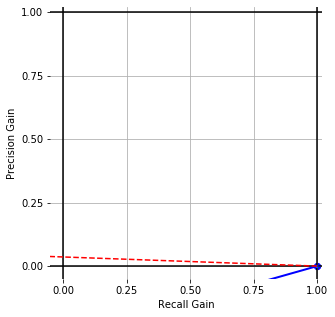

auprg -0.13304449517917347


In [ ]:
compute_precision_recall_gain(y_test, y_score)

## Compute the average precision score¶
Precision is a metric that quantifies the number of correct positive predictions made.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

In [ ]:
def compute_avg_precision(y_test, y_score, label = 'word2vec-wmd'):
    '''Generated precision-recall curve'''
    %matplotlib inline
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill') #reference curve
    precision, recall, _ = precision_recall_curve(y_test, y_score) #compute precision-recall curve
    plt.plot(recall, precision, marker='.', label = label) #plot model curve
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend() #show the legend
    plt.show() #show the plot
    
    average_precision = average_precision_score(y_test, y_score)
    auc_score = auc(recall, precision)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Precision-Recall AUC: %.3f' % auc_score)
    
    pass

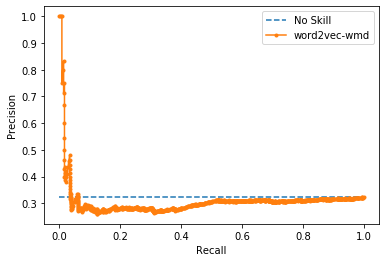

Average precision-recall score: 0.31
Precision-Recall AUC: 0.310


In [ ]:
compute_avg_precision(y_test, y_score)

## Compute ROC Curve
An ROC curve (or receiver operating characteristic curve) is a plot that summarizes the performance of a binary classification model on the positive class [(see Blog)](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/).

Use ROC when both classes detection is equally important — When we want to give equal weight to both classes prediction ability we should look at the ROC curve [link](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba).

In [ ]:
def compute_roc_curve(y_test, y_score, label='word2vec-wmd'):
    %matplotlib inline
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill') #reference curve
    fpr, tpr, _ = roc_curve(y_test, y_score) #compute roc curve
    plt.plot(fpr, tpr, marker='.', label=label) #plot model curve
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend() #show the legend
    plt.show() #show the plot
    
    roc_auc = roc_auc_score(y_test, y_score)
    print('ROC AUC %.3f' % roc_auc)
    
    pass

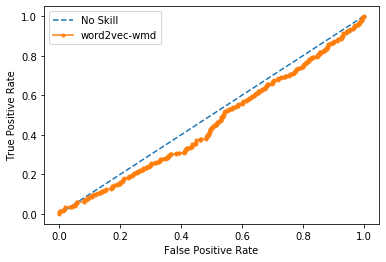

ROC AUC 0.458


In [ ]:
compute_roc_curve(y_test, y_score)

## Compute distribution of similarities

In [ ]:
#Basic Statistics
filter_wmd.describe()

,WMD,Linked?,SimWMD
count,1092.000000,1092.000000,1092.000000
mean,0.415888,0.322344,0.709248
std,0.092413,0.467588,0.045797
min,0.214654,0.000000,0.591856
25%,0.347343,0.000000,0.674507
50%,0.405725,0.000000,0.711376
75%,0.482564,1.000000,0.742202
max,0.689601,1.000000,0.823280


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6b49cc50>,
      dtype=object)

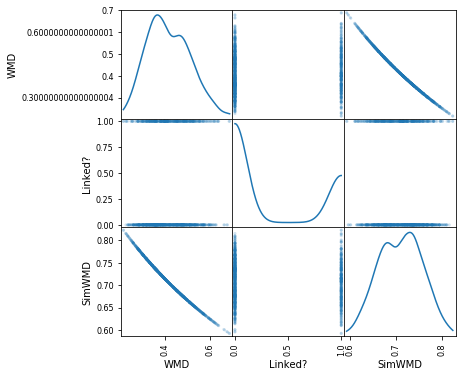

In [ ]:
scatter_matrix(filter_wmd, alpha=0.2, figsize=(6, 6), diagonal='kde')

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. The lag argument may be passed, and when lag=1 the plot is essentially data[:-1] vs. data[1:].

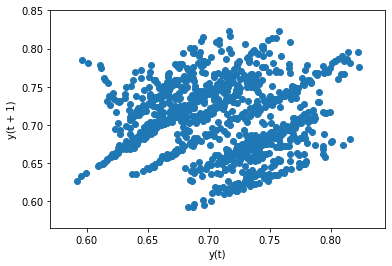

In [ ]:
lag_plot(filter_wmd[['SimWMD']])

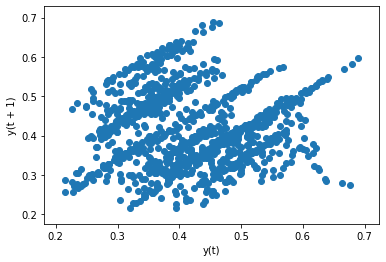

In [ ]:
lag_plot(filter_wmd['WMD'])

In [ ]:
# calculate model precision-recall curve
sim = np.array(filter_wmd['SimWMD'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6b60e898>,
      dtype=object)

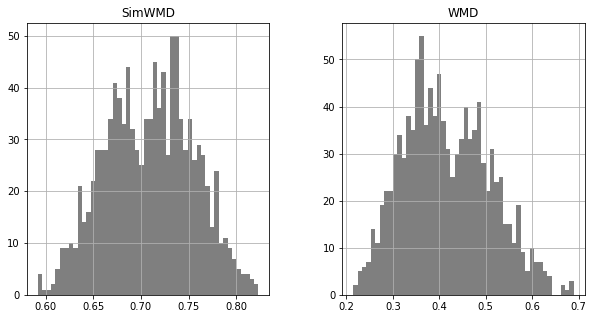

In [ ]:
filter_wmd.hist(column=['SimWMD','WMD'],color='k',bins=50,figsize=[10,5],alpha=0.5)

WMD       0.092413
SimWMD    0.045797
dtype: float64


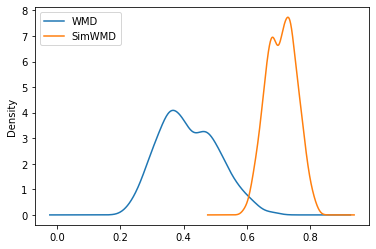

In [ ]:
errors = filter_wmd[['WMD','SimWMD']].std()
print(errors)
filter_wmd[['WMD','SimWMD']].plot.kde()

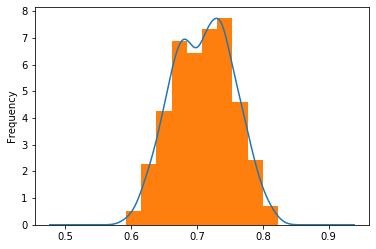

In [ ]:
filter_wmd['SimWMD'].plot.kde()
filter_wmd['SimWMD'].plot.hist(density=True) # Histogram will now be normalized

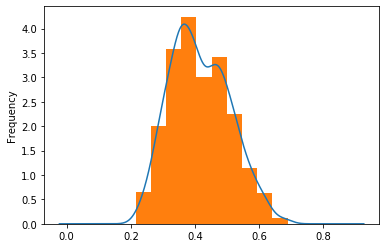

In [ ]:
filter_wmd['WMD'].plot.kde()
filter_wmd['WMD'].plot.hist(density=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6d5529b0>,
      dtype=object)

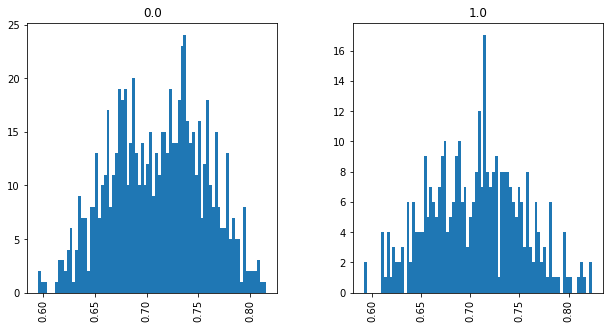

In [ ]:
filter_wmd.hist(by='Linked?',column='SimWMD',figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6d5e69e8>,
      dtype=object)

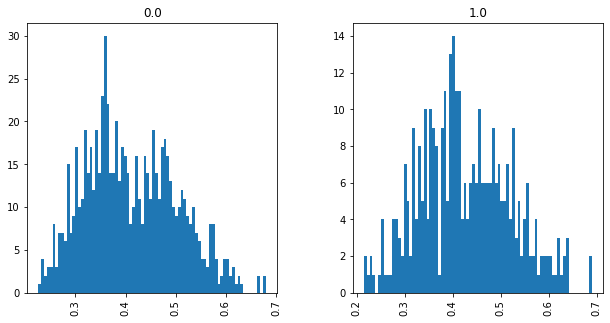

In [ ]:
filter_wmd.hist(by='Linked?',column='WMD',figsize=[10, 5],bins=80)

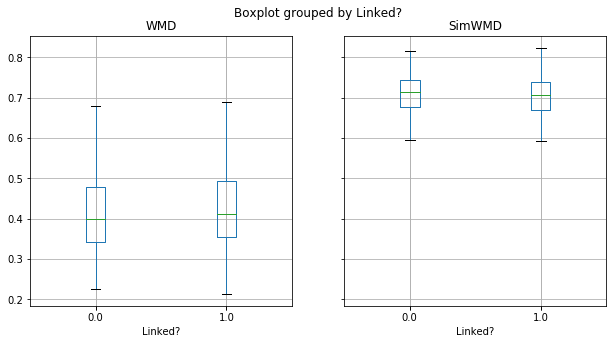

In [ ]:
boxplot = filter_wmd.boxplot(by='Linked?',column=['WMD', 'SimWMD'],figsize=[10, 5])

# Artifacts Similarity with Doc2Vec

Try to reproduce the same empirical evaluation like here: [link](https://arxiv.org/pdf/1507.07998.pdf). Pay attention to:
- Accuracy vs. Dimensionality (we can replace accuracy for false positive rate or true positive rate)
- Visualize paragraph vectors using t-sne

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
from scipy.spatial import distance

In [ ]:
doc2vec_model = gensim.models.Doc2Vec.load("test_data/models/doc2vec_libest.model")

2020-05-14 15:55:15,039 : INFO : loading Doc2Vec object from test_data/models/doc2vec_libest.model
2020-05-14 15:55:15,211 : INFO : loading vocabulary recursively from test_data/models/doc2vec_libest.model.vocabulary.* with mmap=None
2020-05-14 15:55:15,216 : INFO : loading trainables recursively from test_data/models/doc2vec_libest.model.trainables.* with mmap=None
2020-05-14 15:55:15,216 : INFO : loading wv recursively from test_data/models/doc2vec_libest.model.wv.* with mmap=None
2020-05-14 15:55:15,217 : INFO : loading docvecs recursively from test_data/models/doc2vec_libest.model.docvecs.* with mmap=None
2020-05-14 15:55:15,218 : INFO : loaded test_data/models/doc2vec_libest.model


## Computing Cosine Distance and Similarity
More about similarity [link](https://www.kdnuggets.com/2017/08/comparing-distance-measurements-python-scipy.html)

In [ ]:
len(texts)

87

In [ ]:
[artifact for artifact in texts]

[['unit',
  'test',
  'user',
  'stori',
  'server',
  'simpl',
  'enrol',
  'august',
  'copyright',
  'cisco',
  'system',
  'inc',
  'right',
  'reserv',
  'includ',
  'stdio',
  'ifndef',
  'win',
  'includ',
  'unistd',
  'endif',
  'includ',
  'est',
  'includ',
  'curl',
  'curl',
  'includ',
  'curl',
  'util',
  'includ',
  'test',
  'util',
  'includ',
  'server',
  'includ',
  'openssl',
  'ssl',
  'ifdef',
  'cunit',
  'includ',
  'cunit',
  'basic',
  'includ',
  'cunit',
  'autom',
  'endif',
  'ifndef',
  'win',
  'static',
  'char',
  'test',
  'outfil',
  'filenam',
  'max',
  'test',
  'hdr',
  'defin',
  'cacert',
  'est',
  'cacert',
  'crt',
  'defin',
  'explicit_cert',
  'us903',
  'cert',
  'pem',
  'defin',
  'us903_explicit_key',
  'us903',
  'key',
  'pem',
  'defin',
  'us903_cacert',
  'est',
  'cacert',
  'crt',
  'defin',
  'us903_trusted_cert',
  'trustedcert',
  'crt',
  'defin',
  'est',
  'privat',
  'estservercertandkey',
  'pem',
  'els',
  'static'

In [ ]:
inferred_vectors = [doc2vec_model.infer_vector(artifact,steps=200) for artifact in texts]

In [ ]:
inferred_vectors[0]

array([ -1.1176889 ,  -0.6177048 ,  -3.9905896 ,  -6.4753737 ,
        -3.872201  ,  12.254397  ,  -5.8387914 ,  -0.84232974,
         1.3652352 ,  -1.7647672 ,  -1.4574685 ,  10.419813  ,
         3.5808325 ,   3.5164533 ,  -4.4521136 ,  -1.361587  ,
        -0.79026896,  -8.219521  ,   3.1285143 ,   2.3701744 ,
         0.34775093,  -5.0786295 ,  -5.0715985 ,  -0.38772768,
         4.1555934 , -12.001793  ,  -7.3550725 ,   3.1288934 ,
         6.005407  , -13.430271  ,  -3.0299065 ,  -1.0405455 ,
        -1.539779  ,   0.6996303 ,   3.3037078 ,  -3.2883835 ,
        -7.0239615 ,  -1.0774094 ,   8.232128  ,   4.05704   ,
        -4.8672814 ,  -6.7571855 ,   1.3720382 ,  -1.5241847 ,
         1.4317977 ,   6.4475007 ,   2.0175722 ,  -3.86142   ,
         2.9143562 ,  -0.7951027 ], dtype=float32)

In [ ]:
s = m.floor(len(texts)*0.1)
test_corpus = [i[1] for i in enumerate(texts[:s])]
train_corpus = [gensim.models.doc2vec.TaggedDocument(i[1], [i[0]]) for i in enumerate(texts[s:])]

In [ ]:
train_corpus

[TaggedDocument(words=['unit', 'test', 'user', 'stori', 'proxi', 'cacert', 'novemb', 'copyright', 'cisco', 'system', 'inc', 'right', 'reserv', 'proxi', 'mode', 'primarili', 'server', 'mode', 'process', 'certain', 'request', 'client', 'pass', 'long', 'upstream', 'server', 'use', 'client', 'mode', 'function', 'case', 'get', 'cacert', 'proxi', 'mode', 'function', 'almost', 'ident', 'server', 'mode', 'cert', 'respons', 'chain', 'pass', 'sent', 'repli', 'get', 'cacert', 'request', 'downstream', 'client', 'test', 'code', 'taken', 'larg', 'server', 'get', 'cacert', 'includ', 'stdio', 'ifndef', 'win', 'includ', 'unistd', 'endif', 'includ', 'est', 'includ', 'curl', 'curl', 'includ', 'curl', 'util', 'includ', 'test', 'util', 'includ', 'openssl', 'ssl', 'includ', 'server', 'includ', 'proxi', 'ifdef', 'cunit', 'includ', 'cunit', 'basic', 'includ', 'cunit', 'autom', 'endif', 'defin', 'pkcs', 'req', 'miichj', 'ccaw4caqaw', 'qtel', 'mcmga1ueax', 'mccm', 'igj5ignsa', 'wvud', 'cbpbi', 'zw1v', 'ihn0', '

In [ ]:
inferred_vector_1 = doc2vec_model.infer_vector(train_corpus[1].words,steps=200)
inferred_vector_2 = doc2vec_model.infer_vector(train_corpus[2].words,steps=200)

In [ ]:
inferred_vector_1 = inferred_vector_1.reshape(1, -1)
inferred_vector_2 = inferred_vector_2.reshape(1, -1)

In [ ]:
inferred_vector_2

array([  0.7421623 ,  -1.6610512 ,  -0.27062893,   1.2253095 ,
         0.6204487 ,   3.9395065 ,  -8.475632  ,  -2.5868661 ,
        -3.4885607 ,   4.3554783 ,   2.9360406 ,   1.5558928 ,
        -1.9676276 ,   1.1659459 ,  -0.9890286 ,  -4.347019  ,
        -4.6831775 ,  -1.5313215 ,   1.2421937 ,   1.9598829 ,
        -5.0745635 ,  -2.4384894 ,   0.60278225,   0.02906518,
         2.0064855 ,  -5.0548162 ,  -1.3854911 ,   0.02284797,
        -2.6165545 ,  -5.3791456 ,  -4.462908  ,   3.3332286 ,
        -1.1366688 ,  -3.265343  ,   3.7434504 ,   0.79451007,
        -1.5223789 ,   3.2920547 ,   6.55013   ,  -4.9374876 ,
       -10.74753   ,   4.9202447 ,   2.0541866 ,  -9.0258875 ,
         0.78840333,   4.737374  ,   2.6370018 ,  -1.6011399 ,
         4.027021  ,   8.9440155 ], dtype=float32)

In [ ]:
inferred_vector_1

array([  0.99458086,   3.8042338 ,  -4.122127  ,  -2.545438  ,
        -7.756698  ,  -0.05898724,  -6.670509  ,   1.1844435 ,
        -8.986977  ,   7.424119  ,   2.5965197 ,  -1.4187497 ,
        -2.5013008 ,   2.4344692 ,  -0.43273187,  -5.5807047 ,
        -3.7952762 ,   0.9302424 ,   1.6974868 ,   1.5104026 ,
        -1.0017684 , -12.99715   ,  -3.7217016 ,   0.26012018,
         2.6773965 ,  -4.9908156 ,  -2.4933221 ,   6.191346  ,
         0.64167905,   1.104209  ,  -1.0812885 ,   6.2154827 ,
        -1.1711147 ,  -4.8003144 ,   2.5385659 ,  -0.5715181 ,
         1.5128355 ,   4.278371  ,   7.291621  ,  -6.95959   ,
        -5.843113  ,   1.8380492 ,   2.1022904 ,  -6.4695573 ,
        -1.359272  ,   6.700855  ,   2.803053  ,  -0.64266276,
         3.6321049 ,   2.732216  ], dtype=float32)

In [ ]:
cosine_distance = distance.cosine(inferred_vector_2,inferred_vector_1)

In [ ]:
cosine_sim = 1 - cosine_distance

In [ ]:
cosine_distance

0.33237195014953613

In [ ]:
cosine_sim

0.6676280498504639

In [ ]:
df_source.head()

,ids,text
0,test_data/LibEST_semeru_format/requirements/RQ...,requir http uri control est server must suppor...
1,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat respons request...
2,test_data/LibEST_semeru_format/requirements/RQ...,requir http base client authent est server may...
3,test_data/LibEST_semeru_format/requirements/RQ...,requir csr attribut request est client request...
4,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat est client may ...


In [ ]:
df_source['text'].values

array(['requir http uri control est server must support use path prefix well known defin rfc regist name est thus valid est server uri path begin https www exampl com well known est est oper indic path suffix indic intend oper oper correspond uri oper oper path detail distribut cacert section certif must enrol simpleenrol section client must enrol simplereenrol section client must full cmc option fullcmc section server side key serverkeygen section generat option csr attribut csrattr section option figur oper path figur append path prefix form uri use http get post perform desir est oper exampl valid uri absolut path cacert oper "/. well known est cacert retriev certif est client would use follow http request line get well known est cacert http likewis request new certif exampl scheme est client would use follow request line post well known est simpleenrol http use distinct oper path simplifi implement server perform client authent distribut cacert respons est server may provid servic 

In [ ]:
def inferDoc2Vec(df_artifacts):
    df_inferred = df_artifacts.copy()
    df_inferred['inf-doc2vec'] =  [doc2vec_model.infer_vector(artifact.split(),steps=200) for artifact in df_inferred['text'].values]
    return df_inferred

In [ ]:
test_inferDoc2Ve_src = inferDoc2Vec(df_source)
test_inferDoc2Ve_src.head()

,ids,text,inf-doc2vec
0,test_data/LibEST_semeru_format/requirements/RQ...,requir http uri control est server must suppor...,"[-2.636356, -2.7530484, -6.3145146, 2.7833982,..."
1,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat respons request...,"[-3.6872842, -1.9526235, -6.753407, 1.1833869,..."
2,test_data/LibEST_semeru_format/requirements/RQ...,requir http base client authent est server may...,"[-3.2190535, 0.5144771, -4.532445, 4.331405, 0..."
3,test_data/LibEST_semeru_format/requirements/RQ...,requir csr attribut request est client request...,"[-0.60225916, -0.88388175, -2.7159872, -0.6909..."
4,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat est client may ...,"[-3.9676652, -0.41132346, -2.9242516, 2.578940..."


In [ ]:
test_inferDoc2Vec_trg = inferDoc2Vec(df_target)
test_inferDoc2Vec_trg.head()

,ids,text,inf-doc2vec
0,test_data/LibEST_semeru_format/test/us903.c,unit test user stori server simpl enrol august...,"[-0.9726323, -0.625219, -3.9443393, -6.4618187..."
1,test_data/LibEST_semeru_format/test/us3496.c,unit test uri path segment extens support marc...,"[-7.911954, -3.0764554, -2.0087535, 0.5198888,..."
2,test_data/LibEST_semeru_format/test/us899.c,unit test user stori client simpl enrol septem...,"[-2.4165163, -1.6574996, -2.569105, -1.7144568..."
3,test_data/LibEST_semeru_format/test/us4020.c,unit test user stori unit test client proxi mo...,"[-5.5751033, 0.06180786, 2.4144964, -0.8971562..."
4,test_data/LibEST_semeru_format/test/us897.c,unit test user stori client cacert june copyri...,"[-5.611259, -4.0757146, -4.2972593, -0.2270286..."


In [ ]:
#export
'''If the artifacts have very similar content, therefore the WMD should be low'''
def computeDistanceMetricDOC2VEC( df_inferDoc2Vec_src , df_inferDoc2Vec_trg, link, metric="cos" ):
    #TODO Model should be generalized
    ν_inferredSource = list(df_inferDoc2Vec_src[df_inferDoc2Vec_src['ids'].str.contains(link[0])]['inf-doc2vec'])
    w_inferredTarget = list(df_inferDoc2Vec_trg[df_inferDoc2Vec_trg['ids'].str.contains(link[1])]['inf-doc2vec'])
    
    if metric == "cos":
        dist = distance.cosine(ν_inferredSource,w_inferredTarget)
    else:
        dist = None
    return dist

In [ ]:
#export
def computeDistanceSWArtifactsDOC2VEC(df_source, df_target, sampling = False , samples = 10, metric="cos"):
    '''Computes a distance metric from the given sets'''
    links_ = samplingLinks(df_source,df_target, sampling, samples)
    docs = [(link[0], link[1], computeDistanceMetricDOC2VEC( df_source , df_target, link, metric) ) for link in links_]
    return pd.DataFrame(docs, columns =['Source', 'Target', metric]) #Transforming into a Pandas

In [ ]:
df_links_cos = computeDistanceSWArtifactsDOC2VEC(test_inferDoc2Ve_src, test_inferDoc2Vec_trg, sampling=False)

In [ ]:
df_links_cos.head()

,Source,Target,cos
0,RQ17-pre.txt,us903.c,0.777684
1,RQ17-pre.txt,us3496.c,0.540987
2,RQ17-pre.txt,us899.c,0.760152
3,RQ17-pre.txt,us4020.c,0.855632
4,RQ17-pre.txt,us897.c,0.531414


In [ ]:
timestamp = datetime.timestamp(datetime.now())
print('test_data/[libest-req2tc-doc2vec-cos-{}].csv'.format(timestamp))

test_data/[libest-req2tc-doc2vec-cos-1589853951.811696].csv


In [ ]:
#TODO Generalize the name of the sistem, the type of the link and the samples
df_links_cos.to_csv('test_data/[libest-req2tc-doc2vec-cos-{}].csv'.format(timestamp),
                    header=None, index=None, sep=' ', mode='a')

In [ ]:
#Loading from previous WMD Computation
df_links_cos = pd.read_csv('test_data/[libest-req2tc-doc2vec-cos-{}].csv'.format(timestamp),
                           names=['Source', 'Target', 'cos'], 
                           header=None, sep=' ')

### Adding Similarities and Ground Truth

In [ ]:
def ComputingDoc2VecSimilarity(df_links_cos):
    #Compute negative distance of WMD
    sim = [ (1.-float(row.cos)) for row in df_links_cos.itertuples(index=True, name='Pandas')]
    df_links_cos['SimCos'] = sim
    return sim

In [ ]:
ComputingDoc2VecSimilarity(df_links_cos)

[0.2223162204027176,
 0.459012508392334,
 0.239847794175148,
 0.1443675458431244,
 0.4685860574245453,
 0.3265763819217682,
 0.3207018971443176,
 0.4078494906425476,
 0.30243825912475586,
 0.43559783697128296,
 0.4164833128452301,
 0.4993778467178345,
 0.2132929265499115,
 0.24479316174983978,
 0.4527416527271271,
 0.2847694158554077,
 0.10521674901247025,
 0.31132715940475464,
 0.19381442666053772,
 0.26915743947029114,
 0.3215247392654419,
 0.2760469317436218,
 0.27801069617271423,
 0.15462841093540192,
 -0.021904172375798225,
 0.2001117765903473,
 0.18067574501037598,
 0.24613383412361145,
 0.250779390335083,
 0.21412606537342072,
 0.40492233633995056,
 0.3233381509780884,
 0.2473038285970688,
 0.3494497537612915,
 0.27431830763816833,
 0.4757257401943207,
 0.24471217393875122,
 0.23650988936424255,
 0.38324105739593506,
 0.34313932061195374,
 0.23647183179855347,
 0.2580499053001404,
 0.29973870515823364,
 0.15716136991977692,
 0.17513898015022278,
 0.18233954906463623,
 0.13487643

In [ ]:
df_links_cos.head()

,Source,Target,cos,SimCos
0,RQ17-pre.txt,us903.c,0.777684,0.222316
1,RQ17-pre.txt,us3496.c,0.540987,0.459013
2,RQ17-pre.txt,us899.c,0.760152,0.239848
3,RQ17-pre.txt,us4020.c,0.855632,0.144368
4,RQ17-pre.txt,us897.c,0.531414,0.468586


In [ ]:
#Export
def findDoc2VecinDF(links_cos, g_tuple):
    dist = links_cos[links_cos['Source'].str.contains( g_tuple[0][:g_tuple[0].find('.')] + '-' ) 
                 & links_cos['Target'].str.contains(g_tuple[1][:g_tuple[1].find('.')]) ]        
    return dist.index.values

In [ ]:
findDoc2VecinDF(df_links_cos, ground_links[141]) #Testing

array([890])

In [ ]:
#Export
def matchWithGroundTruthDoc2Vec( ground_links , links_doc2vec ):
    df_links_doc2vec = links_doc2vec.copy()
    matchDist = [ findDoc2VecinDF( df_links_doc2vec , g ) for g in ground_links]
    matchDist = functools.reduce(lambda a,b : np.concatenate([a,b]), matchDist)
    df_links_doc2vec["Linked?"] = 0
    new_column = pd.Series(np.full([len(matchDist)], 1 ), name='Linked?', index = matchDist)
    df_links_doc2vec.update(new_column)
    return df_links_doc2vec

In [ ]:
filter_doc2vec = matchWithGroundTruthDoc2Vec(ground_links, df_links_cos)
filter_doc2vec

,Source,Target,cos,SimCos,Linked?
0,RQ17-pre.txt,us903.c,0.777684,0.222316,0.0
1,RQ17-pre.txt,us3496.c,0.540987,0.459013,0.0
2,RQ17-pre.txt,us899.c,0.760152,0.239848,0.0
3,RQ17-pre.txt,us4020.c,0.855632,0.144368,0.0
4,RQ17-pre.txt,us897.c,0.531414,0.468586,0.0
...,...,...,...,...,...
1087,RQ6-pre.txt,us1864.c,0.689165,0.310835,0.0
1088,RQ6-pre.txt,us1159.c,0.702708,0.297292,1.0
1089,RQ6-pre.txt,us2174.c,0.576950,0.423050,0.0
1090,RQ6-pre.txt,us893.c,0.579050,0.420950,1.0


In [ ]:
timestamp = datetime.timestamp(datetime.now())
print('test_data/[libest-req2tc-filter_doc2vec-{}].csv'.format(timestamp))

test_data/[libest-req2tc-filter_doc2vec-1589937858.183836].csv


In [ ]:
#TODO Generalize the name of the sistem, the type of the link and the samples
filter_doc2vec.to_csv('test_data/[libest-req2tc-filter_doc2vec-{}].csv'.format(timestamp),
                    header=None, index=None, sep=' ', mode='a')

In [ ]:
#Loading from previous WMD Computation
filter_doc2vec = pd.read_csv('test_data/[libest-req2tc-filter_doc2vec-{}].csv'.format(timestamp),
                           names=['Source', 'Target', 'cos', 'SimCos', 'Linked?'], 
                           header=None, sep=' ')

In [ ]:
filter_doc2vec.head()

,Source,Target,cos,SimCos,Linked?
0,RQ17-pre.txt,us903.c,0.777684,0.222316,0.0
1,RQ17-pre.txt,us3496.c,0.540987,0.459013,0.0
2,RQ17-pre.txt,us899.c,0.760152,0.239848,0.0
3,RQ17-pre.txt,us4020.c,0.855632,0.144368,0.0
4,RQ17-pre.txt,us897.c,0.531414,0.468586,0.0


# Approach Evaluation and Interpretation (doc2vec)

In [ ]:
y_test_doc2vec = filter_doc2vec['Linked?'].values #Ground_truth Values (or testset)
y_score_doc2vec = filter_doc2vec['SimCos'].values

In [ ]:
y_test_doc2vec #tst

array([0., 0., 0., ..., 0., 1., 1.])

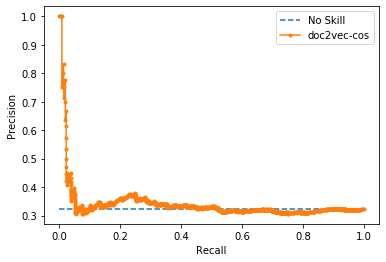

Average precision-recall score: 0.34
Precision-Recall AUC: 0.342


In [ ]:
compute_avg_precision(y_test_doc2vec, y_score_doc2vec, label = 'doc2vec-cos')

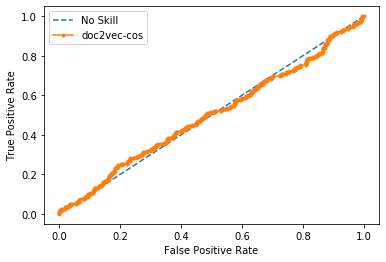

ROC AUC 0.501


In [ ]:
compute_roc_curve(y_test_doc2vec, y_score_doc2vec, label = 'doc2vec-cos')

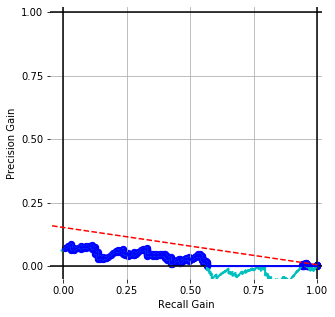

auprg 0.01492948293707843


In [ ]:
compute_precision_recall_gain(y_test_doc2vec, y_score_doc2vec)

In [ ]:
#Basic Statistics
filter_doc2vec.describe()

,cos,SimCos,Linked?
count,1092.000000,1092.000000,1092.000000
mean,0.704826,0.295174,0.322344
std,0.097816,0.097816,0.467588
min,0.409343,-0.067892,0.000000
25%,0.637752,0.232902,0.000000
50%,0.704182,0.295818,0.000000
75%,0.767098,0.362248,1.000000
max,1.067892,0.590657,1.000000


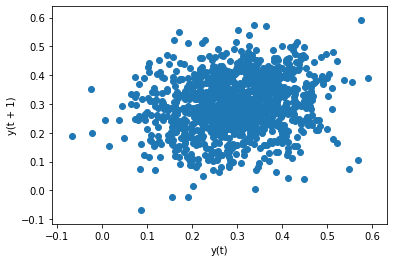

In [ ]:
lag_plot(filter_doc2vec[['SimCos']])

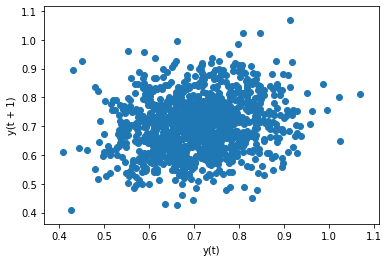

In [ ]:
lag_plot(filter_doc2vec['cos'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf698b4198>,
      dtype=object)

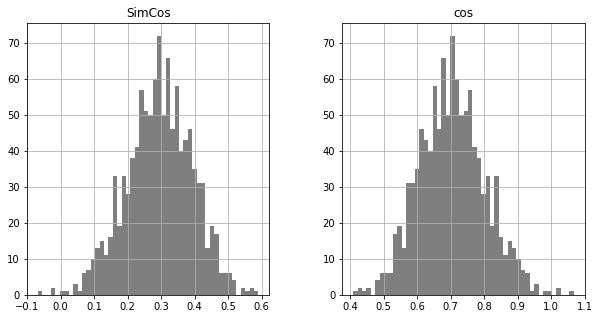

In [ ]:
filter_doc2vec.hist(column=['SimCos','cos'],color='k',bins=50,figsize=[10,5],alpha=0.5)

cos       0.097816
SimCos    0.097816
dtype: float64


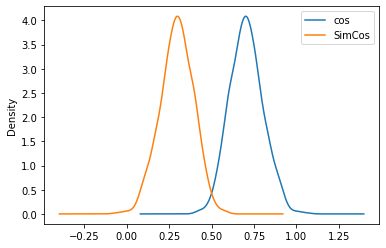

In [ ]:
errors = filter_doc2vec[['cos','SimCos']].std()
print(errors)
filter_doc2vec[['cos','SimCos']].plot.kde()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf68acd8d0>,
      dtype=object)

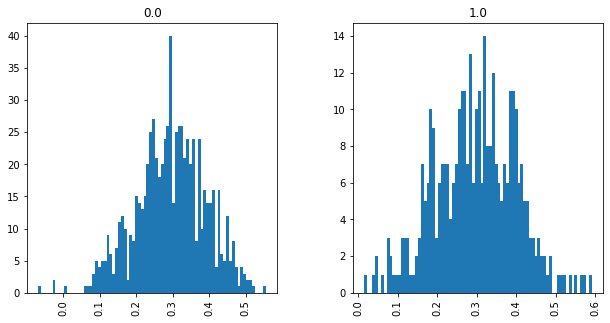

In [ ]:
filter_doc2vec.hist(by='Linked?',column='SimCos',figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf689f0cc0>,
      dtype=object)

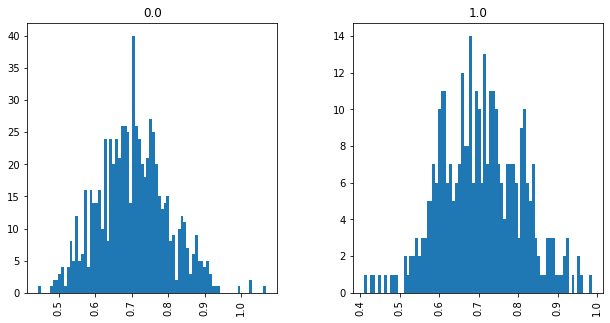

In [ ]:
filter_doc2vec.hist(by='Linked?',column='cos',figsize=[10, 5],bins=80)

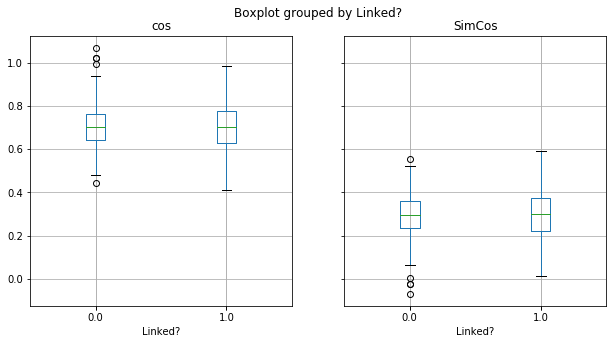

In [ ]:
boxplot = filter_doc2vec.boxplot(by='Linked?',column=['cos', 'SimCos'],figsize=[10, 5])

## Combining Doc2vec and Word2vec
Please check this post for futher detatils [link](https://stats.stackexchange.com/questions/217614/intepreting-doc2vec-cosine-similarity-between-doc-vectors-and-word-vectors)

In [ ]:
! nbdev_build_docs